In [34]:
import os
import platform
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import re

In [35]:
base_windows = "C:\\Users\\Miguel\\Downloads" # windows
base_linux = '/home/miguel/dev/dedup/data' # linux

os_name = platform.system()
base_path = base_windows if os_name == "Windows" else base_linux

folders = []
obj = os.scandir(base_path)
print("Files and Directories in '% s':" % base_path)
for entry in obj :
    if entry.is_dir() or entry.is_file():
        folders.append(entry.name)

Files and Directories in '/home/miguel/dev/dedup/data':


In [36]:
class FastCDCScanResponse:
    def __init__(self, files, chunk_min, chunk_avg, chunk_max, unique_chunks, total_data, dupe_data, dedupe_ratio, throughput, throughput_unit):
        self.files = files
        self.chunk_min = chunk_min
        self.chunk_avg = chunk_avg
        self.chunk_max = chunk_max
        self.unique_chunks = unique_chunks
        self.total_data = total_data
        self.dupe_data = dupe_data
        self.dedupe_ratio = dedupe_ratio
        self.throughput = throughput
        self.throughput_unit = throughput_unit
        
def processFastCDCScanResponse(response):
    r = list(filter(None, re.split('\s|\n', response)))
    if len(r) == 30:
        obj = FastCDCScanResponse(r[1], r[5], r[8], r[11], r[14], r[17], r[21], r[25], r[28], r[29])
        return obj
    return None

def processFoldersbyChunk(folders, chunk_min, chunk_avg, chunk_max):
    responses = []
    for folder in folders:
        if not folder == 'memorydumps': 
            #print("Processing Folder: " + str(folder))
            command = "fastcdc scan " + base_path + "/" + str(folder) + " -r -mi " + str(chunk_min) + " -s "+ str(chunk_avg) + " -ma " + str(chunk_max)
            output = subprocess.check_output(command, shell=True).decode('utf-8')
            response = processFastCDCScanResponse(output)
            if response:
                responses.append(response)
    return responses

def processDedup(tests):
    o = []
    for chunk_size in tests.keys():
        j = []
        for folder in tests[chunk_size]:
            d = folder.dedupe_ratio
            j.append(float(d))
        o.append(j)
    return np.array(o)

def processThroughput(tests):
    o = []
    for chunk_size in tests.keys():
        j = []
        for folder in tests[chunk_size]:
            d = folder.throughput
            unit = folder.throughput_unit
            if unit == 'GB/s':
                j.append(float(d) * 1000)
            else:
                j.append(float(d))
        o.append(j)
    return np.array(o)

In [44]:
#Fixed 4096

num_tests = 10
curr_chunk_size = 4096
fixed_4096_tests = {}
for i in range(1, num_tests + 1):
    print("\nTest: " + str(i) + " Chunk Size: " + str(curr_chunk_size))
    fixed_4096_tests[curr_chunk_size] = processFoldersbyChunk(folders, curr_chunk_size, curr_chunk_size, curr_chunk_size)
    curr_chunk_size += 4096
    
dedup_ratios_fixed_4096 = processDedup(fixed_4096_tests)
throughput_speeds_fixed_4096  = processThroughput(fixed_4096_tests)
#print(tests)


Test: 1 Chunk Size: 4096

Test: 2 Chunk Size: 8192

Test: 3 Chunk Size: 12288

Test: 4 Chunk Size: 16384

Test: 5 Chunk Size: 20480

Test: 6 Chunk Size: 24576

Test: 7 Chunk Size: 28672

Test: 8 Chunk Size: 32768

Test: 9 Chunk Size: 36864

Test: 10 Chunk Size: 40960


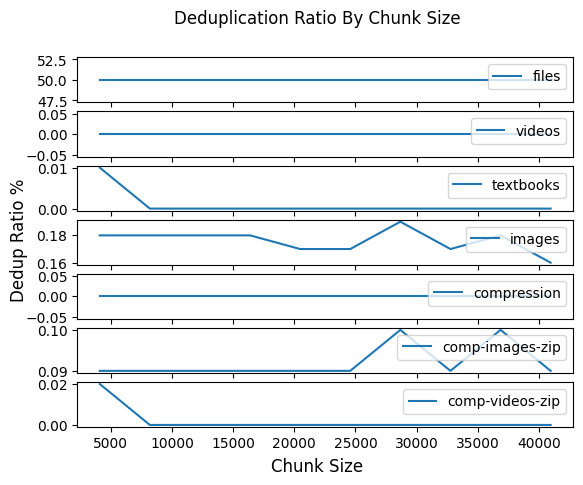

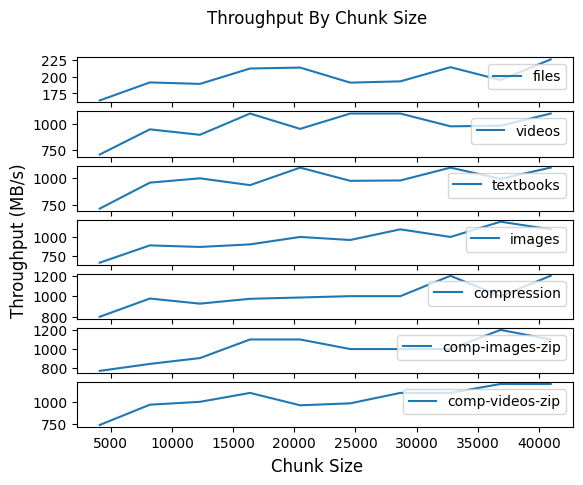

In [47]:
fig, axs = plt.subplots(len(folders) - 1)
xs = fixed_4096_tests.keys()
for idx, c in enumerate(dedup_ratios_fixed_4096.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    #axs[idx].set_xlabel("Chunk Size")
    #axs[idx].set_ylabel("Dedup Ratio")
    
fig.suptitle('Deduplication Ratio By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Dedup Ratio %')

fig, axs = plt.subplots(len(folders) - 1)
for idx, c in enumerate(throughput_speeds_fixed_4096.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    #axs[idx].set_xlabel("Chunk Size")
    #axs[idx].set_ylabel("Dedup Ratio")
    
fig.suptitle('Throughput By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Throughput (MB/s)')

plt.show()

In [48]:
#2048 Range

byte_range = 2048
num_tests = 10
curr_chunk_size = 4096
range_2048_tests = {}
for i in range(1, num_tests + 1):
    print("\nTest: " + str(i) + " Chunk Size: " + str(curr_chunk_size))
    range_2048_tests[curr_chunk_size] = processFoldersbyChunk(folders, curr_chunk_size - byte_range, curr_chunk_size, curr_chunk_size + byte_range)
    curr_chunk_size += 4096
    
dedup_ratios_range_2048 = processDedup(range_2048_tests)
throughput_speeds_range_2048  = processThroughput(range_2048_tests)
#print(tests)


Test: 1 Chunk Size: 4096

Test: 2 Chunk Size: 8192

Test: 3 Chunk Size: 12288

Test: 4 Chunk Size: 16384

Test: 5 Chunk Size: 20480

Test: 6 Chunk Size: 24576

Test: 7 Chunk Size: 28672

Test: 8 Chunk Size: 32768

Test: 9 Chunk Size: 36864

Test: 10 Chunk Size: 40960


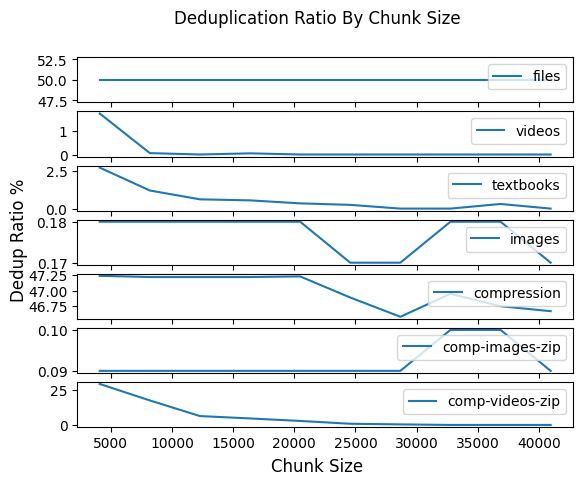

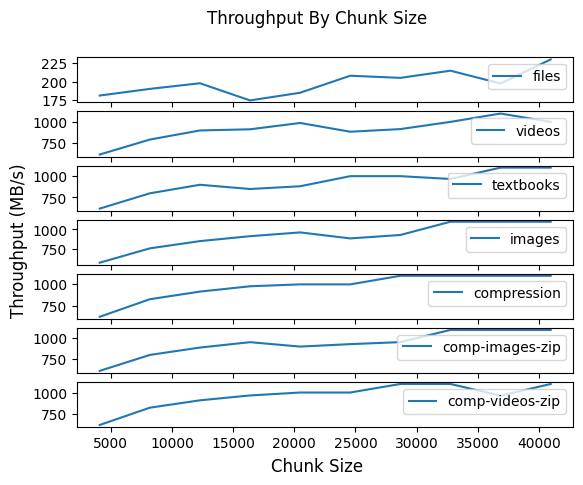

In [49]:
fig, axs = plt.subplots(len(folders) - 1)
xs = range_2048_tests.keys()
for idx, c in enumerate(dedup_ratios_range_2048.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    #axs[idx].set_xlabel("Chunk Size")
    #axs[idx].set_ylabel("Dedup Ratio")
    
fig.suptitle('Deduplication Ratio By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Dedup Ratio %')

fig, axs = plt.subplots(len(folders) - 1)
for idx, c in enumerate(throughput_speeds_range_2048.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    #axs[idx].set_xlabel("Chunk Size")
    #axs[idx].set_ylabel("Dedup Ratio")
    
fig.suptitle('Throughput By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Throughput (MB/s)')

plt.show()

In [51]:
#4096 Range

byte_range = 4096
num_tests = 10
curr_chunk_size = 8192
range_4096_tests = {}
for i in range(1, num_tests + 1):
    print("\nTest: " + str(i) + " Chunk Size: " + str(curr_chunk_size))
    range_4096_tests[curr_chunk_size] = processFoldersbyChunk(folders, curr_chunk_size - byte_range, curr_chunk_size, curr_chunk_size + byte_range)
    curr_chunk_size += 4096
    
dedup_ratios_range_4096 = processDedup(range_4096_tests)
throughput_speeds_range_4096  = processThroughput(range_4096_tests)
#print(tests)


Test: 1 Chunk Size: 8192

Test: 2 Chunk Size: 12288

Test: 3 Chunk Size: 16384

Test: 4 Chunk Size: 20480

Test: 5 Chunk Size: 24576

Test: 6 Chunk Size: 28672

Test: 7 Chunk Size: 32768

Test: 8 Chunk Size: 36864

Test: 9 Chunk Size: 40960

Test: 10 Chunk Size: 45056


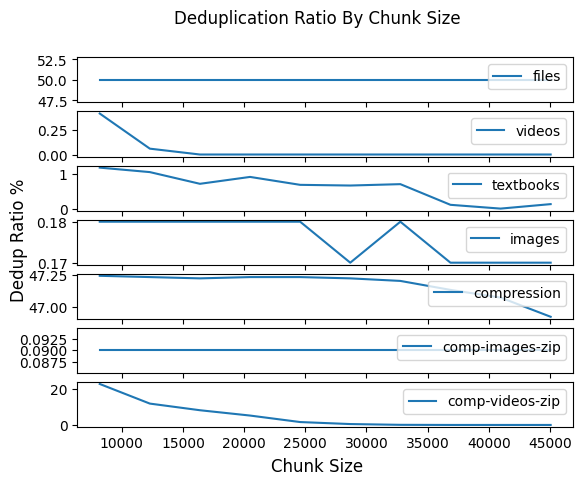

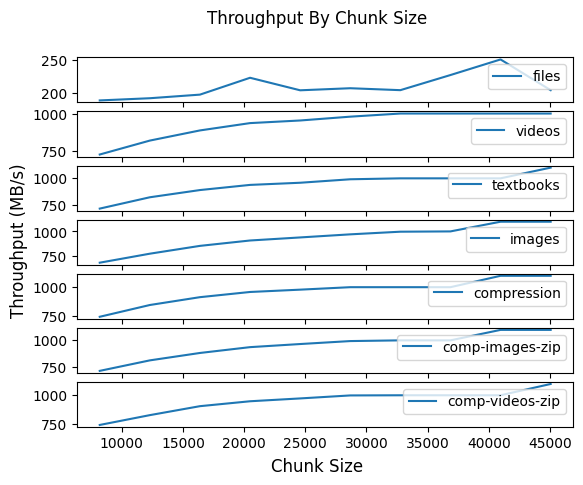

In [52]:
fig, axs = plt.subplots(len(folders) - 1)
xs = range_4096_tests.keys()
for idx, c in enumerate(dedup_ratios_range_4096.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    #axs[idx].set_xlabel("Chunk Size")
    #axs[idx].set_ylabel("Dedup Ratio")
    
fig.suptitle('Deduplication Ratio By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Dedup Ratio %')

fig, axs = plt.subplots(len(folders) - 1)
for idx, c in enumerate(throughput_speeds_range_4096.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    #axs[idx].set_xlabel("Chunk Size")
    #axs[idx].set_ylabel("Dedup Ratio")
    
fig.suptitle('Throughput By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Throughput (MB/s)')

plt.show()

In [53]:
#8192 Range

byte_range = 8192
num_tests = 10
curr_chunk_size = 12288
range_8192_tests = {}
for i in range(1, num_tests + 1):
    print("\nTest: " + str(i) + " Chunk Size: " + str(curr_chunk_size))
    range_8192_tests[curr_chunk_size] = processFoldersbyChunk(folders, curr_chunk_size - byte_range, curr_chunk_size, curr_chunk_size + byte_range)
    curr_chunk_size += 4096
    
dedup_ratios_range_8192 = processDedup(range_8192_tests)
throughput_speeds_range_8192  = processThroughput(range_8192_tests)
#print(tests)


Test: 1 Chunk Size: 12288

Test: 2 Chunk Size: 16384

Test: 3 Chunk Size: 20480

Test: 4 Chunk Size: 24576

Test: 5 Chunk Size: 28672

Test: 6 Chunk Size: 32768

Test: 7 Chunk Size: 36864

Test: 8 Chunk Size: 40960

Test: 9 Chunk Size: 45056

Test: 10 Chunk Size: 49152


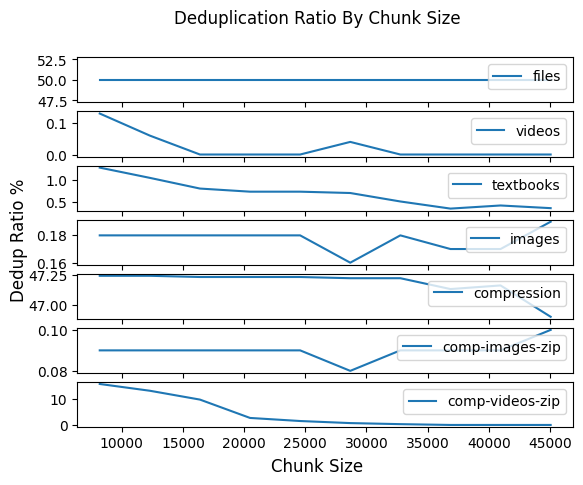

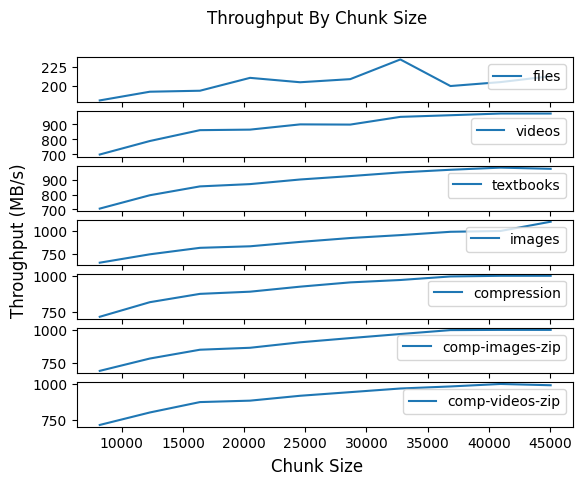

In [54]:
fig, axs = plt.subplots(len(folders) - 1)
xs = range_4096_tests.keys()
for idx, c in enumerate(dedup_ratios_range_8192.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    #axs[idx].set_xlabel("Chunk Size")
    #axs[idx].set_ylabel("Dedup Ratio")
    
fig.suptitle('Deduplication Ratio By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Dedup Ratio %')

fig, axs = plt.subplots(len(folders) - 1)
for idx, c in enumerate(throughput_speeds_range_8192.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    #axs[idx].set_xlabel("Chunk Size")
    #axs[idx].set_ylabel("Dedup Ratio")
    
fig.suptitle('Throughput By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Throughput (MB/s)')

plt.show()

## Memory Dumps

### C

In [55]:
from elftools.elf.elffile import ELFFile

memorydump_files = []
obj = os.scandir(base_path + '/memorydumps/initial/C')
print("Files and Directories in '% s':" % (base_path + '/memorydumps/initial/C'))
for entry in obj :
    if not entry.is_dir() or entry.is_file():
        memorydump_files.append(entry.name)

Files and Directories in '/home/miguel/dev/dedup/data/memorydumps/initial/C':


In [56]:
for file in memorydump_files:
    with open(base_linux + f'/memorydumps/initial/C/{file}', 'rb') as f:
        print(f"Processing File: {file}")
        
        # Create an ELFFile object
        elf = ELFFile(f)

        # Read the ELF header
        print('ELF Type:', elf.header['e_type'])
        print('Machine Architecture:', elf.header['e_machine'])

        # Read the section header table
        sh_table = elf.get_section_by_name('.shstrtab')
        for section in elf.iter_sections():
            print('Section:', section.name)
            print('Size:', section['sh_size'])
            print('Address:', hex(section['sh_addr']))
        print("End Of File \n")

Processing File: 600.perlbench_s_5.dump
ELF Type: ET_CORE
Machine Architecture: EM_X86_64
Section: 
Size: 0
Address: 0x0
Section: note0
Size: 3320
Address: 0x0
Section: load
Size: 24576
Address: 0x557d4d60d000
Section: load
Size: 8192
Address: 0x557d4d613000
Section: load
Size: 8192
Address: 0x557d4d615000
Section: load
Size: 202825728
Address: 0x557d4f30a000
Section: load
Size: 946176
Address: 0x7fcff6363000
Section: load
Size: 16384
Address: 0x7fcff68a5000
Section: load
Size: 8192
Address: 0x7fcff68a9000
Section: load
Size: 16384
Address: 0x7fcff68ab000
Section: load
Size: 4096
Address: 0x7fcff6ac8000
Section: load
Size: 4096
Address: 0x7fcff6ac9000
Section: load
Size: 16384
Address: 0x7fcff6aca000
Section: load
Size: 4096
Address: 0x7fcff6e6a000
Section: load
Size: 4096
Address: 0x7fcff6e6b000
Section: load
Size: 528384
Address: 0x7fcff6e9f000
Section: load
Size: 536576
Address: 0x7fcff6f20000
Section: load
Size: 245760
Address: 0x7fcff6fbf000
Section: load
Size: 278528
Address: 0x7

In [57]:
def all_zero(bytes_read): 
    for byte in bytes_read:
        if not byte == 0:
            return False
    return True

In [53]:
for file in memorydump_files:
    with open(base_linux + f'/memorydumps/initial/C/{file}', 'rb') as f:
        print(f"Processing File: {file}")
        
        all_zero_pages_count = 0
        total_pages = 0
        
        with open(base_linux + f'/memorydumps/clean/C/{file}_2', 'wb') as output_file:
            
            while (bytes_read := f.read(4096)):
                total_pages += 1

                if not bytes:
                    break

                all_zeros = all_zero(bytes_read)
                if all_zeros == True:

                    modified_data = bytes_read.replace(b'\x00', b'')
                    output_file.write(modified_data)

                    all_zero_pages_count += 1
                else:
                    output_file.write(bytes_read)
            
        print(f"Found {all_zero_pages_count} all-zero pages")  
        print(f"Found {total_pages} total pages")
        

Processing File: 600.perlbench_s_5.dump
Found 1904 all-zero pages
Found 50210 total pages
Processing File: 620.omnetpp_s_5.dump
Found 91 all-zero pages
Found 56553 total pages
Processing File: parsec_fluidanimate5dump
Found 2560 all-zero pages
Found 134337 total pages
Processing File: parsec_freqmine5dump
Found 8437 all-zero pages
Found 144150 total pages


In [58]:
# Check for all-zero pages
for file in memorydump_files:
    with open(base_linux + f'/memorydumps/clean/C/{file}_2', 'rb') as f:
        print(f"Processing File: {file}")
        
        all_zero_pages_count = 0
        total_pages = 0
        
       
        while (bytes_read := f.read(4096)):
            total_pages += 1

            if not bytes:
                break

            all_zeros = all_zero(bytes_read)
            if all_zeros == True:
                all_zero_pages_count += 1
            
        print(f"Found {all_zero_pages_count} all-zero pages")  
        print(f"Found {total_pages} total pages")
        

Processing File: 600.perlbench_s_5.dump
Found 0 all-zero pages
Found 48306 total pages
Processing File: 620.omnetpp_s_5.dump
Found 0 all-zero pages
Found 56462 total pages
Processing File: parsec_fluidanimate5dump
Found 0 all-zero pages
Found 131777 total pages
Processing File: parsec_freqmine5dump
Found 0 all-zero pages
Found 135713 total pages


In [70]:
# Memory Dump Range 2048
folders = ['/memorydumps/initial/C', '/memorydumps/clean/C']

range_bytes = 2048
num_tests = 10
curr_chunk_size = 4096
memory_range_2048_tests = {}
for i in range(1, num_tests + 1):
    print("\nTest: " + str(i) + " Chunk Size: " + str(curr_chunk_size))
    memory_range_2048_tests[curr_chunk_size] = processFoldersbyChunk(folders, curr_chunk_size - range_bytes, curr_chunk_size, curr_chunk_size + range_bytes)
    curr_chunk_size += 4096
    
dedup_ratios_memory_range_2048 = processDedup(memory_range_2048_tests)
throughput_speeds_memory_range_2048  = processThroughput(memory_range_2048_tests)
#print(tests)


Test: 1 Chunk Size: 4096

Test: 2 Chunk Size: 8192

Test: 3 Chunk Size: 12288

Test: 4 Chunk Size: 16384

Test: 5 Chunk Size: 20480

Test: 6 Chunk Size: 24576

Test: 7 Chunk Size: 28672

Test: 8 Chunk Size: 32768

Test: 9 Chunk Size: 36864

Test: 10 Chunk Size: 40960


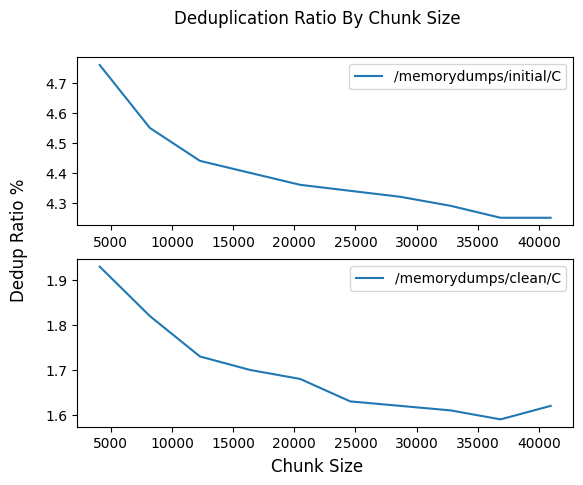

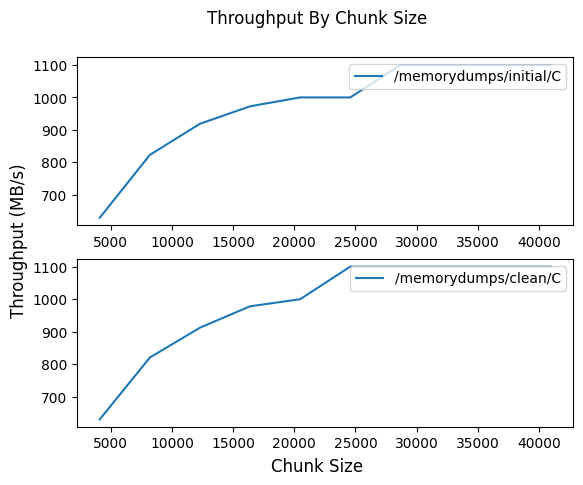

In [72]:
fig, axs = plt.subplots(len(folders))
xs = memory_range_2048_tests.keys()
for idx, c in enumerate(dedup_ratios_memory_range_2048.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    
fig.suptitle('Deduplication Ratio By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Dedup Ratio %')

fig, axs = plt.subplots(len(folders))
for idx, c in enumerate(throughput_speeds_memory_range_2048.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    #axs[idx].set_xlabel("Chunk Size")
    #axs[idx].set_ylabel("Dedup Ratio")
    
fig.suptitle('Throughput By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Throughput (MB/s)')
plt.show()

In [74]:
# Memory Dump Range 4096
folders = ['/memorydumps/initial/C', '/memorydumps/clean/C']

range_bytes = 4096
num_tests = 10
curr_chunk_size = 8192
memory_range_4096_tests = {}
for i in range(1, num_tests + 1):
    print("\nTest: " + str(i) + " Chunk Size: " + str(curr_chunk_size))
    memory_range_4096_tests[curr_chunk_size] = processFoldersbyChunk(folders, curr_chunk_size - range_bytes, curr_chunk_size, curr_chunk_size + range_bytes)
    curr_chunk_size += 4096
    
dedup_ratios_memory_range_4096 = processDedup(memory_range_4096_tests)
throughput_speeds_memory_range_4096  = processThroughput(memory_range_4096_tests)
#print(tests)


Test: 1 Chunk Size: 8192

Test: 2 Chunk Size: 12288

Test: 3 Chunk Size: 16384

Test: 4 Chunk Size: 20480

Test: 5 Chunk Size: 24576

Test: 6 Chunk Size: 28672

Test: 7 Chunk Size: 32768

Test: 8 Chunk Size: 36864

Test: 9 Chunk Size: 40960

Test: 10 Chunk Size: 45056


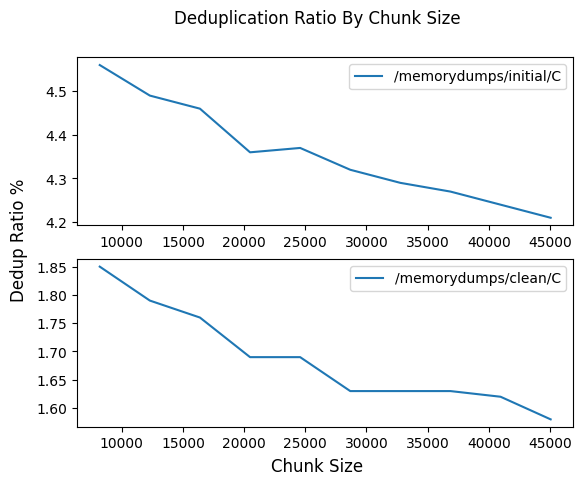

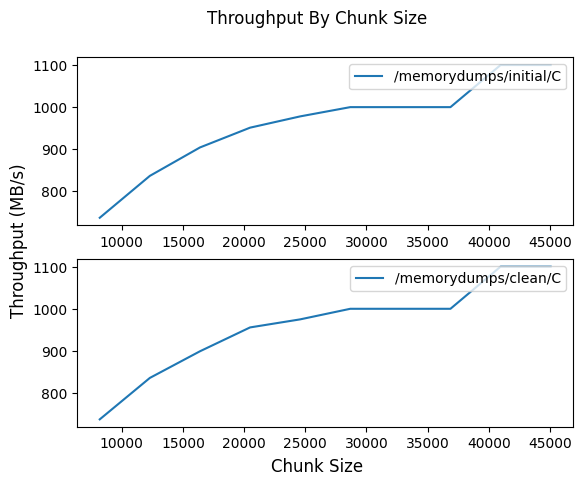

In [75]:
fig, axs = plt.subplots(len(folders))
xs = memory_range_4096_tests.keys()
for idx, c in enumerate(dedup_ratios_memory_range_4096.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    
fig.suptitle('Deduplication Ratio By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Dedup Ratio %')

fig, axs = plt.subplots(len(folders))
for idx, c in enumerate(throughput_speeds_memory_range_4096.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    #axs[idx].set_xlabel("Chunk Size")
    #axs[idx].set_ylabel("Dedup Ratio")
    
fig.suptitle('Throughput By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Throughput (MB/s)')
plt.show()

In [76]:
# Memory Dump Range 8192
folders = ['/memorydumps/initial/C', '/memorydumps/clean/C']

range_bytes = 8192
num_tests = 10
curr_chunk_size = 12288
memory_range_8192_tests = {}
for i in range(1, num_tests + 1):
    print("\nTest: " + str(i) + " Chunk Size: " + str(curr_chunk_size))
    memory_range_8192_tests[curr_chunk_size] = processFoldersbyChunk(folders, curr_chunk_size - range_bytes, curr_chunk_size, curr_chunk_size + range_bytes)
    curr_chunk_size += 4096
    
dedup_ratios_memory_range_8192 = processDedup(memory_range_8192_tests)
throughput_speeds_memory_range_8192  = processThroughput(memory_range_8192_tests)
#print(tests)


Test: 1 Chunk Size: 12288

Test: 2 Chunk Size: 16384

Test: 3 Chunk Size: 20480

Test: 4 Chunk Size: 24576

Test: 5 Chunk Size: 28672

Test: 6 Chunk Size: 32768

Test: 7 Chunk Size: 36864

Test: 8 Chunk Size: 40960

Test: 9 Chunk Size: 45056

Test: 10 Chunk Size: 49152


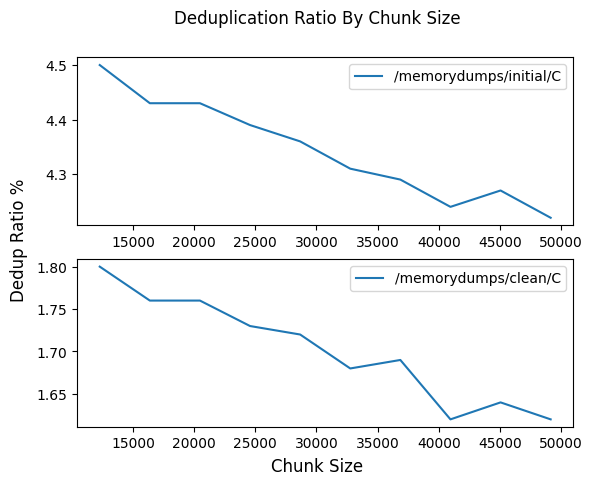

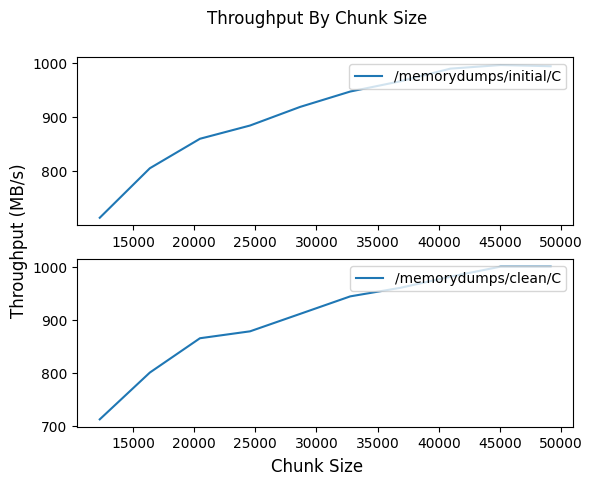

In [77]:
fig, axs = plt.subplots(len(folders))
xs = memory_range_8192_tests.keys()
for idx, c in enumerate(dedup_ratios_memory_range_8192.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    
fig.suptitle('Deduplication Ratio By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Dedup Ratio %')

fig, axs = plt.subplots(len(folders))
for idx, c in enumerate(throughput_speeds_memory_range_8192.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    #axs[idx].set_xlabel("Chunk Size")
    #axs[idx].set_ylabel("Dedup Ratio")
    
fig.suptitle('Throughput By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Throughput (MB/s)')
plt.show()